<a href="https://colab.research.google.com/github/erc-kluijtmans/Machine-Learning/blob/master/Insurance_premium_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/explainable-artificial-intelligence-part-3-hands-on-machine-learning-model-interpretation-e8ebe5afc608

Check out the link above before starting

But also this one from Microsoft InterpretML. https://github.com/interpretml/interpret

In [ ]:
%matplotlib inline 

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!pip install shap

     |████████████████████████████████| 356 kB 12.9 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491644 sha256=7ef9c800ac5eed14b1b9d67ccb6852d46044ce95af8a4edb41a1fb1fdc7a7619
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import shap

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving adultv1.csv to adultv1.csv
User uploaded file "adultv1.csv" with length 3428761 bytes


In [ ]:
data = pd.read_csv('adultv1.csv')
data.head(10)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,risk
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,1
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,1
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,1
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,1
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,1
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,1
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,1
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,0
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,1
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,0


In [ ]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
risk               int64
dtype: object

In [ ]:
data['workclass'] = data['workclass'].astype('category')
data['education'] = data['education'].astype('category')
data['marital.status'] = data['marital.status'].astype('category')
data['occupation'] = data['occupation'].astype('category')
data['relationship'] = data['relationship'].astype('category')
data['race'] = data['race'].astype('category')
data['sex'] = data['sex'].astype('category')
data['native.country'] = data['native.country'].astype('category')
data.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education.num        int64
marital.status    category
occupation        category
relationship      category
race              category
sex               category
capital.gain         int64
capital.loss         int64
hours.per.week       int64
native.country    category
risk                 int64
dtype: object

In [ ]:
obj_df[obj_df.isnull().any(axis=1)]

NameError: ignored

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

  
data['workclass_cat']= le.fit_transform(data['workclass'])
data['education_cat']= le.fit_transform(data['education'])
data['marital.status_cat']= le.fit_transform(data['marital.status'])
data['occupation_cat']= le.fit_transform(data['occupation'])
data['relationship_cat']= le.fit_transform(data['relationship'])
data['race_cat']= le.fit_transform(data['race'])
data['sex_cat']= le.fit_transform(data['sex'])
data['native.country_cat']= le.fit_transform(data['native.country'])

data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,risk,workclass_cat,education_cat,marital.status_cat,occupation_cat,relationship_cat,race_cat,sex_cat,native.country_cat
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,1,0,11,6,0,1,4,0,39
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,1,4,11,6,4,1,4,0,39
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,1,0,15,6,0,4,2,0,39
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,1,4,5,0,7,4,4,0,39
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,1,4,15,5,10,3,4,0,39


In [ ]:
data.dtypes

age                      int64
workclass             category
fnlwgt                   int64
education             category
education.num            int64
marital.status        category
occupation            category
relationship          category
race                  category
sex                   category
capital.gain             int64
capital.loss             int64
hours.per.week           int64
native.country        category
risk                     int64
workclass_cat            int64
education_cat            int64
marital.status_cat       int64
occupation_cat           int64
relationship_cat         int64
race_cat                 int64
sex_cat                  int64
native.country_cat       int64
dtype: object

In [ ]:
#data = data.drop(labels=[2], axis=0)
data = data.drop(columns=["workclass", "education","marital.status","occupation", "relationship","native.country","race","sex"])
data.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,risk,workclass_cat,education_cat,marital.status_cat,occupation_cat,relationship_cat,race_cat,sex_cat,native.country_cat
0,90,77053,9,0,4356,40,1,0,11,6,0,1,4,0,39
1,82,132870,9,0,4356,18,1,4,11,6,4,1,4,0,39
2,66,186061,10,0,4356,40,1,0,15,6,0,4,2,0,39
3,54,140359,4,0,3900,40,1,4,5,0,7,4,4,0,39
4,41,264663,10,0,3900,40,1,4,15,5,10,3,4,0,39


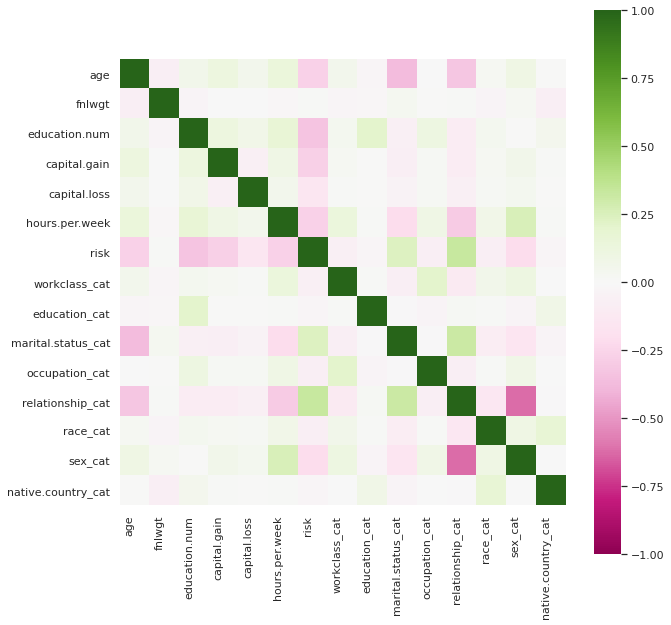

In [ ]:
corr = data.corr(method='spearman')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
 
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap="PiYG",
    square=True,
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [ ]:
Y = data['risk']
X =  data[['age', 'fnlwgt', 'education.num',
        'capital.gain', 'capital.loss', 'hours.per.week',
       'workclass_cat', 'education_cat', 'marital.status_cat','occupation_cat','relationship_cat','race_cat','sex_cat', 'native.country_cat']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
X_train.head(3)

(22792, 14) (9769, 14)


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_cat,education_cat,marital.status_cat,occupation_cat,relationship_cat,race_cat,sex_cat,native.country_cat
19749,58,290661,9,0,0,40,4,11,2,3,0,4,1,39
1216,62,109463,10,0,1617,33,4,15,5,12,4,4,0,39
27962,33,137088,13,0,0,40,4,9,2,7,0,3,1,7


In [ ]:
%%time

import xgboost as xgb
xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=42)
xgc.fit(X_train, y_train)

CPU times: user 8.99 s, sys: 51.6 ms, total: 9.04 s
Wall time: 9.16 s


In [ ]:
predictions = xgc.predict(X_test)
predictions[:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[1523  817]
 [ 437 6992]]


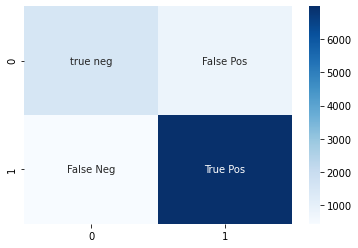

In [ ]:
labels = ['true neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

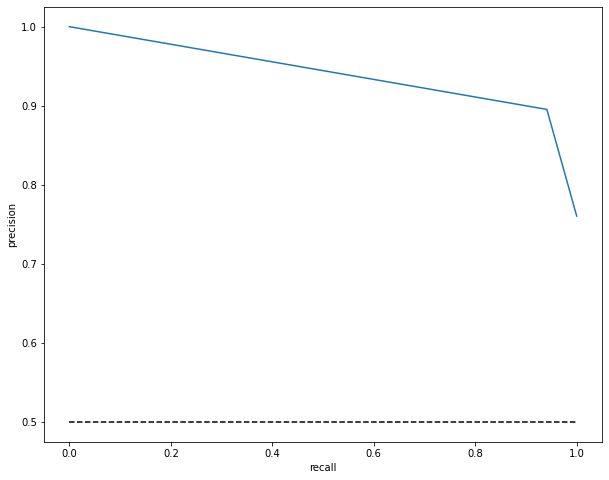

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, predictions)
plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'Risk')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

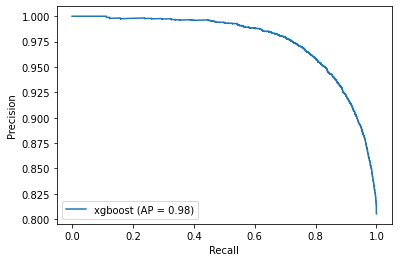

In [ ]:

from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(xgc, X_test, y_test, name = 'xgboost')


These curves give the shape we would expect — at thresholds with low recall, the precision is correspondingly high, and at very high recall, the precision begins to drop

Text(0.5, 1.0, 'Precision-Recall Curve')

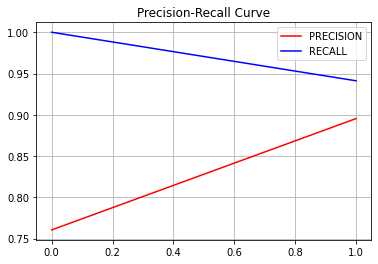

In [ ]:
# Plot Precision-Recall curve using sklearn.
from sklearn.metrics import precision_recall_curve
precision, recall, treshold = precision_recall_curve(y_test, predictions)

# Plot the output.
plt.plot(treshold, precision[:-1], c ='r', label ='PRECISION')
plt.plot(treshold, recall[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall Curve')



from https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

Best Threshold=1.000000, F-Score=0.918


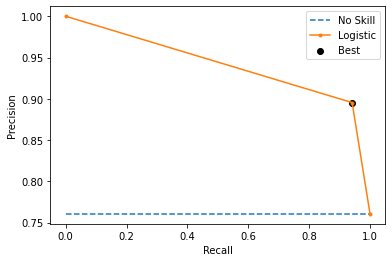

In [ ]:
from numpy import argmax
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [ ]:
explainer = shap.TreeExplainer(xgc)
shap_values = explainer.shap_values(X_test)
print('Expected Value:', explainer.expected_value)
pd.DataFrame(shap_values).head()

Expected Value: 1.3705083


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.389037,0.137652,0.118026,0.161775,0.064935,0.024903,-0.003011,-0.009045,-0.537961,0.759647,-0.472835,-0.035040,-0.047598,-0.018186
1,3.812540,-0.509365,0.083583,0.115521,0.056987,1.134173,-0.016233,-0.294725,1.292654,-0.339415,1.039306,0.001804,-0.037364,-0.018719
2,0.483523,-0.497858,0.073278,0.123520,0.050372,0.009155,0.048923,-0.105585,-0.575356,-0.223429,-1.155457,-0.051381,0.165619,-0.048062
3,0.027329,0.141726,0.867826,0.112826,0.038833,-0.437242,-0.011983,-0.003646,0.857900,-0.182589,0.279335,-0.063902,-0.123114,0.011196
4,3.699747,0.553912,0.080046,0.127286,0.060198,0.782862,-0.067251,0.282963,1.198418,0.315995,0.845744,0.027647,0.312596,0.092588


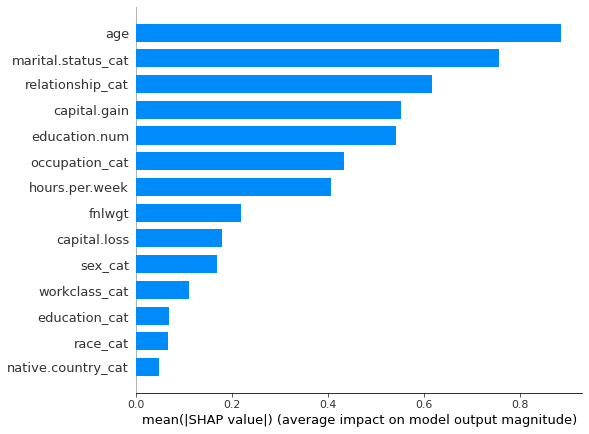

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

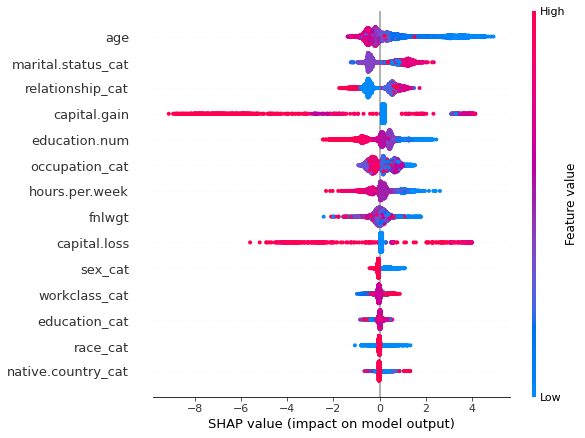

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[2,:], X_test.iloc[2,:])


In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[:100,:], X_test.iloc[:100,:])

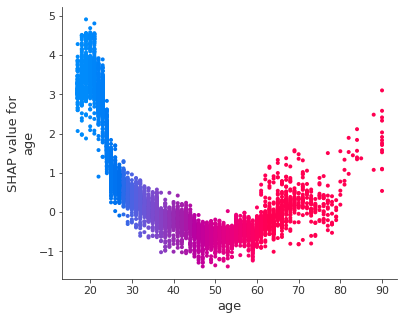

In [ ]:

shap.dependence_plot(ind='age', interaction_index='age',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

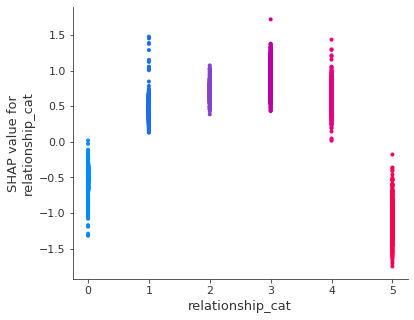

In [ ]:
shap.dependence_plot(ind='relationship_cat', interaction_index='relationship_cat',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

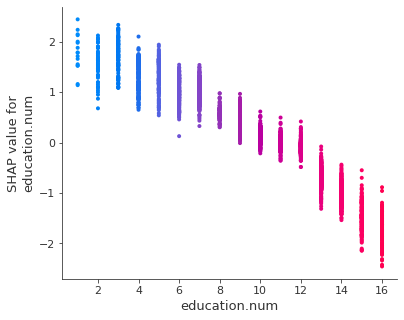

In [ ]:
shap.dependence_plot(ind='education.num', interaction_index='education.num',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

Higher education levels have higher shap values (+1=risk; 0=no risk), pushing the model’s prediction decisions to say that these individuals represent lower risk as compared to people with lower education levels.

Here we are trying to see interactions between Age and Capital Gain and also their effect on the SHAP values which lead to the model predicting if the person will represent more risk, with the help of a two-way partial dependence plot.

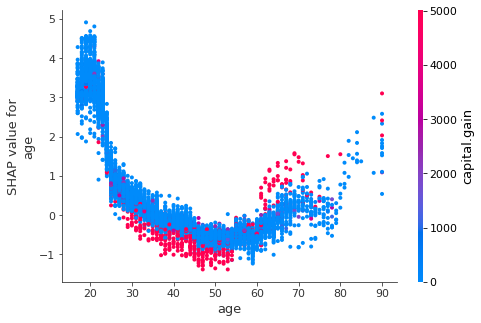

In [ ]:
shap.dependence_plot(ind='age', interaction_index='capital.gain', 
                     shap_values=shap_values, features=X_test, 
                     display_features=X_test)

Interesting to see higher the higher capital gain and the middle-aged folks (30–50) having the lower risk!
